In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from parsing import remove_flatlines, get_daily_shifts

In [2]:
base_path = Path.home()/"OneDrive-3E/RD_ResourceData/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder/data_sites"

## read sites metadata

In [3]:
sites_metadata = pd.read_csv(os.path.join(base_path, "sites_metadata.csv"), index_col=0)
sites_metadata

,country,latitude,longitude,altitude,provider
station_name,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn
carpentras,France,44.08,5.06,100.0,bsrn
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn
magurele_mars,Romania,44.34,26.01,110.0,bsrn
cabauw,Netherlands,51.97,4.93,0.0,bsrn
...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc
gonzaga,Italy,44.96,10.77,16.0,lombardy


## get reference (hourly and daily), clearsky and costheta

In [4]:
reference_hourly = pd.DataFrame()
reference_daily = pd.DataFrame()
clearsky = pd.DataFrame()
costheta = pd.DataFrame()

reference_hourly.index = pd.DatetimeIndex(reference_hourly.index)
reference_daily.index = pd.DatetimeIndex(reference_daily.index)
clearsky.index = pd.DatetimeIndex(clearsky.index)
costheta.index = pd.DatetimeIndex(costheta.index)

In [5]:
for site in list(sites_metadata.index):

    reference_site = pd.read_csv(os.path.join(base_path, "raw_reference", f"{site}_raw_reference_data.csv"), index_col=0)
    reference_site = pd.DataFrame(reference_site)
    reference_site.index = pd.DatetimeIndex(reference_site.index)
    
    if sites_metadata.loc[site]["provider"] == "wrdc":
        
        reference_daily = pd.concat([reference_daily, reference_site], axis=1)

    else:
        
        reference_hourly = pd.concat([reference_hourly, reference_site], axis=1)
        
        clearsky_site = pd.read_csv(os.path.join(base_path, "clearsky", f"{site}_clearsky_data.csv"), index_col=0)
        clearsky_site = pd.DataFrame(clearsky_site)
        clearsky_site.index = pd.DatetimeIndex(clearsky_site.index)
        
        clearsky = pd.concat([clearsky, clearsky_site], axis=1)
        
        costheta_site = pd.read_csv(os.path.join(base_path, "costheta", f"{site}_costheta_data.csv"), index_col=0)
        costheta_site = pd.DataFrame(costheta_site)
        costheta_site.index = pd.DatetimeIndex(costheta_site.index)
        
        costheta = pd.concat([costheta, costheta_site], axis=1)

## parse hourly

### min max quality check

In [6]:
f"Minimum value: {reference_hourly.min().min()}"

'Minimum value: 0.0'

In [7]:
f"Maximum value: {reference_hourly.max().max()}"

'Maximum value: 1165.8'

=> Min and max values are in plausible range.

### remove flatlines

In [8]:
reference_hourly

,camborne,carpentras,budapest_lorinc,magurele_mars,cabauw,cener,payerne,heino,lauwersoog,lelystad_locatie_23t,...,lautertal_oberlauter,leinefelde,bremen,stuttgart_schnarrenberg,nürnberg,weihenstephan_dürnast,saarbrücken_ensheim,gonzaga,landriano,cornale
2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2022-10-31 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2022-10-31 21:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2022-10-31 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [9]:
reference_hourly.where(reference_hourly.apply(remove_flatlines).isna()).count().sort_values()

camborne                       0
carpentras                     0
budapest_lorinc                0
magurele_mars                  0
cabauw                         0
cener                          0
gonzaga                        0
landriano                      0
payerne                        4
seehausen                      6
cornale                       29
heino                         30
stavoren                      31
saarbrücken_ensheim           38
lauwersoog                    38
hohenpeißenberg               39
leinefelde                    40
lelystad_locatie_23t          41
dresden_klotzsche             42
lautertal_oberlauter          43
herwijnen                     46
stuttgart_schnarrenberg       59
nürnberg                      77
schleswig                     80
bremen                        96
weihenstephan_dürnast        125
rostock_warnemünde           281
hamburg_fuhlsbüttel         1195
görlitz                     2723
mannheim                   27079
dtype: int

In [10]:
reference_hourly = reference_hourly.apply(remove_flatlines)

In [11]:
reference_hourly.where(reference_hourly.apply(remove_flatlines).isna()).count().sort_values()

camborne                   0
gonzaga                    0
saarbrücken_ensheim        0
weihenstephan_dürnast      0
nürnberg                   0
stuttgart_schnarrenberg    0
bremen                     0
leinefelde                 0
lautertal_oberlauter       0
dresden_klotzsche          0
rostock_warnemünde         0
seehausen                  0
hamburg_fuhlsbüttel        0
görlitz                    0
schleswig                  0
mannheim                   0
hohenpeißenberg            0
herwijnen                  0
stavoren                   0
lelystad_locatie_23t       0
lauwersoog                 0
heino                      0
payerne                    0
cener                      0
cabauw                     0
magurele_mars              0
budapest_lorinc            0
carpentras                 0
landriano                  0
cornale                    0
dtype: int64

### drop data during the night
A lot of 1.0 values can be seen during the night. These values are removed.

In [12]:
reference_hourly = reference_hourly.where(reference_hourly > 0).where(costheta > 0)

### correct for time shift

In [13]:
daily_shifts = pd.DataFrame({site: get_daily_shifts(clearsky[site], reference_hourly[site], threshold=2000) for site in reference_hourly})

<Axes: >

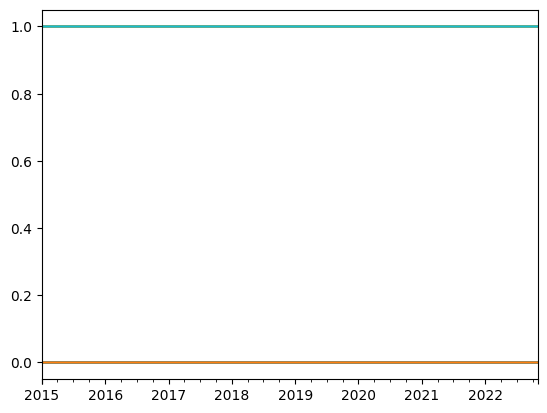

In [14]:
daily_shifts.plot(legend=False)

<Axes: >

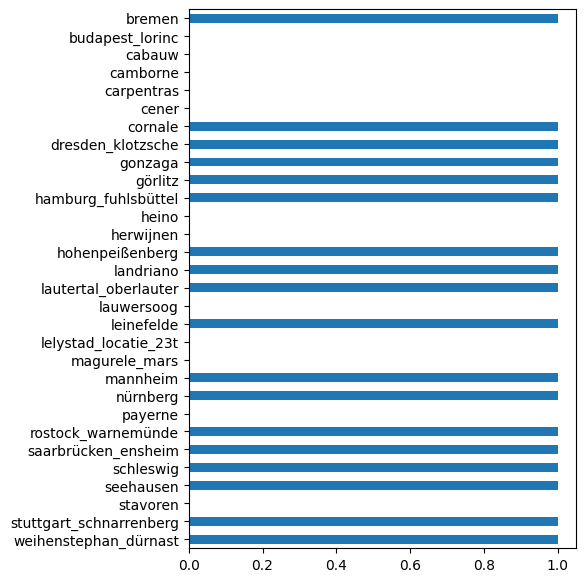

In [15]:
daily_shifts.mean().sort_index(ascending=False).plot.barh(figsize=(5,7))

In [16]:
reference_hourly = reference_hourly.apply(lambda x: x.shift(periods=-daily_shifts.mean().astype(int)[x.name]))

In [17]:
daily_shifts_after = pd.DataFrame({site: get_daily_shifts(clearsky[site], reference_hourly[site], threshold=2000) for site in reference_hourly})

<Axes: >

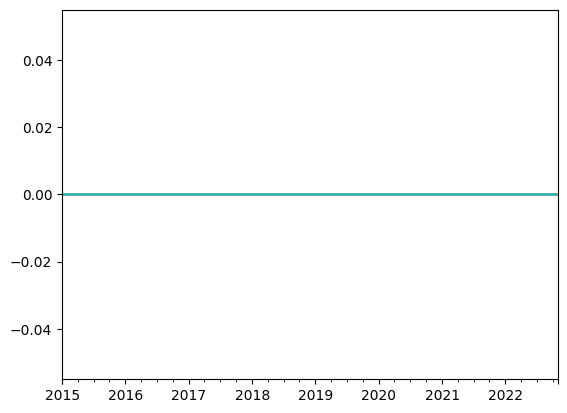

In [18]:
daily_shifts_after.plot(legend=False)

<Axes: >

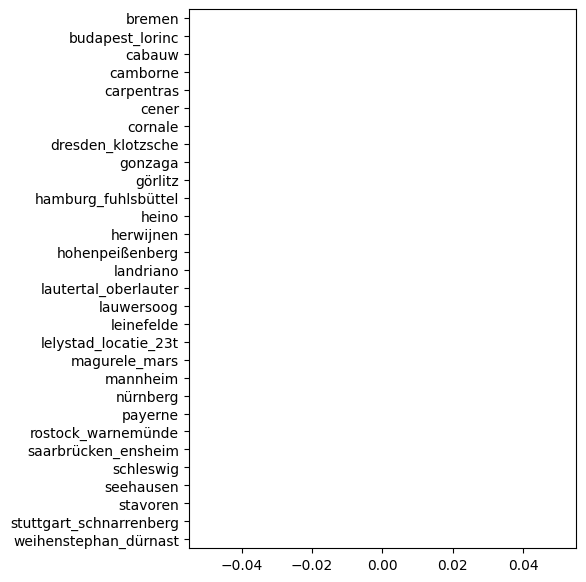

In [19]:
daily_shifts_after.mean().sort_index(ascending=False).plot.barh(figsize=(5,7))

### export

In [20]:
reference_hourly.to_csv(os.path.join(base_path, "parsed", "parsed_reference_data_hourly.csv"))

## parse daily

### min max quality check

In [21]:
f"Minimum value: {reference_daily.min().min()}"

'Minimum value: 13.889'

In [22]:
f"Maximum value: {reference_daily.max().max()}"

'Maximum value: 9800.0'

=> Min and max values are in plausible range.

### remove 0.0-values

=> no 0.0 values.

### export

In [23]:
reference_daily.to_csv(os.path.join(base_path, "parsed", "parsed_reference_data_daily.csv"))